In [21]:
# Import needed libraries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from functools import reduce
import numpy as np

In [22]:
# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse = pd.read_csv(mouse_metadata_path)
study = pd.read_csv(study_results_path)

In [23]:
# Combine the data into a single dataset
print(mouse.shape)
mouse.head()

# Display the data table for preview


(249, 5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [24]:
print(study.head())
print(study.shape)
study.sort_values(by=['Mouse ID'])
print(study['Mouse ID'].nunique())

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0
(1893, 4)
249


In [25]:
# Join tables
df = pd.merge(study, mouse, how="left", on="Mouse ID")
df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [26]:
# Check number of unique mice
print(df['Mouse ID'].nunique())

249


In [27]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups_study = df[df.duplicated(['Mouse ID', 'Timepoint'])]
dups_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [28]:
# Optional: Get all the data for the duplicate mouse ID. 
df.loc[(df['Mouse ID'] == "g989")]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.loc[(df['Mouse ID'] != "g989")]
print(clean_df['Mouse ID'].nunique())
clean_df

248


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [30]:
tumor_means = clean_df.groupby('Drug Regimen', as_index=False)['Tumor Volume (mm3)'].mean()
tumor_med = clean_df.groupby('Drug Regimen',  as_index=False)['Tumor Volume (mm3)'].median()
tumor_var = clean_df.groupby('Drug Regimen',  as_index=False)['Tumor Volume (mm3)'].var()
tumor_std = clean_df.groupby('Drug Regimen',  as_index=False)['Tumor Volume (mm3)'].std()
tumor_sem = clean_df.groupby('Drug Regimen',  as_index=False)['Tumor Volume (mm3)'].sem()

# https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
stats = reduce(lambda left,right: pd.merge(left, right, on='Drug Regimen'), [tumor_means, tumor_med, tumor_var, tumor_std, tumor_sem])

stats.columns = ['Drug Regimen', 'Mean Tumor Vol (mm3)', 'Median Tumor Vol (mm3)', 'Variance Tumor Vol', 'Std Dev Tumor Vol',
                'SEM Tumor Vol']

stats

,Drug Regimen,Mean Tumor Vol (mm3),Median Tumor Vol (mm3),Variance Tumor Vol,Std Dev Tumor Vol,SEM Tumor Vol
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [31]:
# Produce same table as above using .agg method
stats1 = clean_df.groupby('Drug Regimen', as_index=False)['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
stats1

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


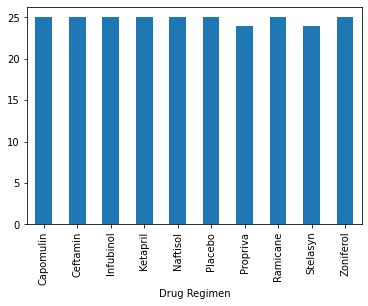

10


In [42]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
uniquemice = clean_df.groupby('Drug Regimen')['Mouse ID'].nunique()
uniquemice.plot(kind='bar')
plt.show()
print(len(uniquemice))

([<matplotlib.axis.XTick at 0x281ea671490>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

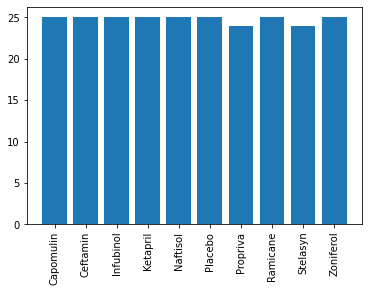

In [46]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
xaxis = np.arange(len(uniquemice))
plt.bar(xaxis, uniquemice)
ticks = [val for val in xaxis]
plt.xticks(ticks, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva",
                  "Ramicane", "Stelasyn", "Zoniferol"], rotation=90)
